COLLOBARITIVE FILTERING - NEURAL COLLOBARITIVE FILTERING

In [2]:
#GMM Method

In [3]:
# ✅ GMM Clustering for Playlist Similarity

import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load the merged dataset
df = pd.read_csv("new_features.csv")

# 2. Select relevant song-level features for content
feature_cols = [
    "danceability", "energy", "key", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo"
]

# 3. Compute playlist-level feature averages
playlist_features = df.groupby("pid")[feature_cols].mean()
playlist_features.reset_index(inplace=True)

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(playlist_features[feature_cols])

In [4]:
# 5. Fit GMM
n_components = 10  # Number of clusters (can tune this)
gmm = GaussianMixture(n_components=n_components, random_state=42)
clusters = gmm.fit_predict(X_scaled)

# 6. Attach cluster labels
playlist_features["cluster"] = clusters

# Save mapping from pid → cluster
pid_cluster_map = dict(zip(playlist_features["pid"], playlist_features["cluster"]))

In [5]:
# 7. Function: Get similar playlists

def get_similar_playlists(pid, top_n=15):
    if pid not in pid_cluster_map:
        print("Playlist ID not found.")
        return []

    cluster_id = pid_cluster_map[pid]
    similar_playlists = playlist_features[playlist_features["cluster"] == cluster_id]["pid"].tolist()
    similar_playlists = [p for p in similar_playlists if p != pid]
    return similar_playlists[:top_n]

In [6]:
# Example usage:
query_pid = df["pid"].iloc[0]
similar_pids = get_similar_playlists(query_pid)
print(f"\n🎧 Similar playlists to {query_pid}:\n", similar_pids)


🎧 Similar playlists to 0:
 [1, 5, 31, 36, 38, 40, 68, 95, 105, 107, 123, 124, 136, 170, 173]


In [16]:
# 8. Export to CSV file
df = pd.DataFrame(similar_pids)
df.to_csv("similar_pids.csv", index=False, header=False)

In [14]:
# Loop through each recommended playlist ID and print its songs
for pid in similar_pids:
    print(f"\n🎵 Playlist {pid}:")

    songs = df[df["pid"] == pid].drop_duplicates()

    for idx, row in songs.iterrows():
        print(f"   - {row['track_name']} by {row['artist_name']}")
print(similar_pids)


🎵 Playlist 1:
   - Eye of the Tiger by Survivor
   - The Room Where It Happens by Leslie Odom Jr.
   - Right Hand Man by Christopher Jackson
   - Alexander Hamilton by Leslie Odom Jr.
   - My Shot by Lin-Manuel Miranda
   - Stairway To Heaven by Led Zeppelin
   - Peace of Mind by Boston
   - Foreplay / Long Time by Boston
   - Hold the Line by Toto
   - Carry on Wayward Son by Kansas
   - More Than a Feeling by Boston
   - Kashmir by Led Zeppelin

🎵 Playlist 5:
   - Low (feat T-Pain) - Feat T-Pain Album Version by Flo Rida
   - Play That Funky Music by Wild Cherry
   - Miami by Will Smith
   - Jump by Kris Kross
   - Summer by Calvin Harris
   - Shower by Becky G
   - Timber by Pitbull

🎵 Playlist 31:
   - Outside by Calvin Harris
   - Lush Life by Zara Larsson
   - Whip It! by LunchMoney Lewis
   - Perfect by One Direction
   - Somebody to Love Me by Tryon
   - Work from Home by Fifth Harmony
   - No Money by Galantis
   - Dying for You (feat. Alex Aris) by Otto Knows
   - Where I Wa

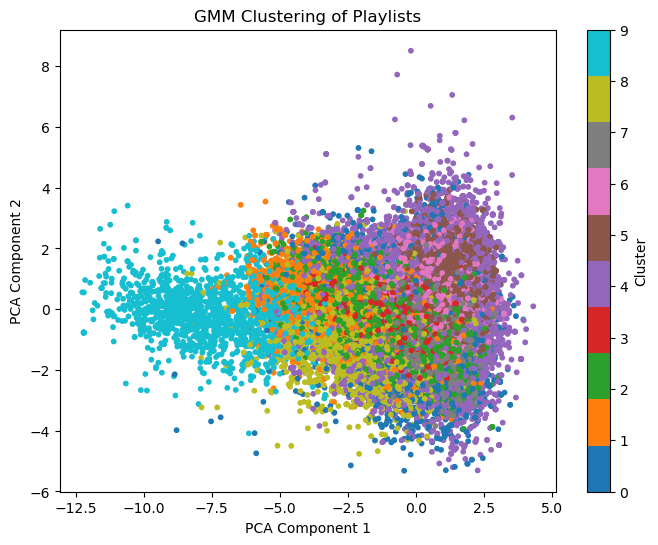

In [8]:
# Optional: Visualize clusters in 2D
from sklearn.decomposition import PCA
X_2d = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap="tab10", s=10)
plt.title("GMM Clustering of Playlists")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()